In [1]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'gM38xaGqcBtgBKhfsNgZOwYVf'
consumer_secret = 'h9KTOW1mfgWEljLeEklmpEK0oezi41PdDfoxiAslR5cDneRpg0'
access_token = '1133466916238966784-tvgVgkp4PgRDeBgRzzk89KrG57KIHq'
access_secret = 'DcS3d0AoAYf9qlcVBUDvQ0sQCXq1ovtDZFM4mgbqcwpIQ'

In [3]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
df_1 = pd.read_csv('twitter-archive-enhanced-2.csv')
df_1.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
241,846505985330044928,NaN,NaN,2017-03-27 23:35:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",THIS WAS NOT HIS FAULT HE HAD NO IDEA. 11/10 S...,NaN,NaN,NaN,https://twitter.com/shomaristone/status/846484...,11,10,None,None,None,None,None
1703,680913438424612864,NaN,NaN,2015-12-27 00:49:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Griswold. He's dapper as hell. Already pu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680913438...,11,10,Griswold,None,None,None,None
577,800855607700029440,NaN,NaN,2016-11-22 00:17:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Lin_Manuel: 11/10 would recommend. https:/...,8.008540e+17,79923701.0,2016-11-22 00:10:52 +0000,https://twitter.com/littlewiewel/status/800852...,11,10,None,None,None,None,None


In [7]:
.# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

2356

In [8]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except:
        print("Error for: " + str(tweet))
end = timer()
print(end - start)


Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 872261713294495745
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 856602993587888130
Error for: 845459076796616705
Error for: 844704788403113984
Error for: 842892208864923648
Error for: 837012587749474308
Error for: 827228250799742977
Error for: 812747805718642688
Error for: 802247111496568832
Error for: 775096608509886464
Error for: 770743923962707968


Rate limit reached. Sleeping for: 775


Error for: 754011816964026368
Error for: 680055455951884288


Rate limit reached. Sleeping for: 765


1887.0335675


In [9]:
with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_data, file)

In [119]:
with open('tweet_json.txt') as file:
    data = json.load(file)
    
df_list = []

for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favorites = data[tweet_id]['favorite_count']# + data[tweet_id]['favourites_count']
    df_list.append({'tweet_id': tweet_id,
                        'retweets': retweets,
                        'favorites': favorites})
    
tweets_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'favorites'])
tweets_df.sample(5)

,tweet_id,retweets,favorites
73,878316110768087041,6422,0
1425,696744641916489729,982,2135
1458,693629975228977152,833,2530
1240,710283270106132480,538,2205
1946,673345638550134785,1292,2517


In [11]:
import requests
import os

In [12]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

folder = 'image-predictions'
if not os.path.exists(folder):
    os.makedirs(folder)
    
with open(os.path.join(folder, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    
os.listdir(folder)

img_predictions_df = pd.read_csv(folder + '/image-predictions.tsv', sep='\t')
img_predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1154,732732193018155009,https://pbs.twimg.com/media/CiswCQhWYAI5-QW.jpg,1,koala,0.162935,False,Staffordshire_bullterrier,0.127969,True,mongoose,0.096421,False
77,667437278097252352,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,1,porcupine,0.989154,False,bath_towel,0.006300,False,badger,0.000966,False
107,667873844930215936,https://pbs.twimg.com/media/CUTDtyGXIAARxus.jpg,1,common_iguana,0.999647,False,frilled_lizard,0.000181,False,African_chameleon,0.000128,False
725,686050296934563840,https://pbs.twimg.com/media/CYVXBb9WsAAwL3p.jpg,1,Pomeranian,0.985789,True,keeshond,0.004083,True,Pekinese,0.003334,True
795,690938899477221376,https://pbs.twimg.com/media/CZa1QnSWEAAEOVr.jpg,1,geyser,0.370318,False,seashore,0.274888,False,beacon,0.046397,False


In [13]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
img_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
img_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
tweet_id     2337 non-null object
retweets     2337 non-null int64
favorites    2337 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


In [22]:
tweets_df.head()

,tweet_id,retweets,favorites
0,892420643555336193,8172,37490
1,892177421306343426,6049,32242
2,891815181378084864,4001,24285
3,891689557279858688,8317,40828
4,891327558926688256,9019,39042


In [24]:
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [36]:
df_1.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [62]:
len(df_1)-df_1.retweeted_status_id.isna().sum()

181

There are 181 retweets.

In [43]:
df_1[df_1['tweet_id'].duplicated() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [44]:
tweets_df[tweets_df['tweet_id'].duplicated() == True]

,tweet_id,retweets,favorites


In [45]:
img_predictions_df[img_predictions_df['tweet_id'].duplicated() == True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [54]:
len(df_1.retweeted_status_id.isnull() == T)

2356

In [86]:
df_1.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [97]:
print(df_1[df_1.rating_denominator != 10].expanded_urls[433])

https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1


***

## data cleaning

In [71]:
# Take a copy 
df_1_clean = df_1.copy()

In [72]:
df_1_clean.replace(to_replace=['None'], value=np.nan, inplace=True)


In [73]:
df_1_clean['timestamp'] = pd.to_datetime(df_1_clean['timestamp'], format = "%Y-%m-%d %H:%M:%S +%f")

In [74]:
df_1_clean = df_1_clean[df_1_clean.retweeted_status_id.isnull()]

In [75]:
len(df_1_clean) - df_1_clean.retweeted_status_id.isna().sum()

0

In [76]:
df_1_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [77]:
dict_name= {'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter for iPhone',
           '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine',
           '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':'Twitter Web Client',
           '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>' : 'TweetDeck'}

In [78]:
df_1_clean.source.replace(to_replace= dict_name, inplace=True)


In [79]:
df_1_clean.source.value_counts()

Twitter for iPhone    2042
Vine                    91
Twitter Web Client      31
TweetDeck               11
Name: source, dtype: int64

In [85]:
df_1_clean.source = df_1_clean.source.astype('category')

In [80]:
df_1_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [81]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1495 non-null object
doggo                    87 non-null object
floofer                  10 non-null object
pupper                   234 non-null object
puppo                    25 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 254.9+ KB


In [84]:
df_1_clean[df_1_clean.in_reply_to_status_id.notna()].sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
843,766714921925144576,7.667118e+17,4.196984e+09,2016-08-19 19:14:16,Twitter for iPhone,His name is Charley and he already has a new s...,NaN,13,10,NaN,NaN,NaN,NaN,NaN
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44,Twitter for iPhone,"Two sneaky puppers were not initially seen, mo...",https://twitter.com/dog_rates/status/684225744...,143,130,NaN,NaN,NaN,NaN,NaN
1005,747651430853525504,7.476487e+17,4.196984e+09,2016-06-28 04:42:46,Twitter for iPhone,Other pupper asked not to have his identity sh...,NaN,12,10,NaN,NaN,NaN,pupper,NaN
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03,Twitter for iPhone,@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,14,10,NaN,NaN,NaN,NaN,NaN
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25,Twitter for iPhone,"I was going to do 007/10, but the joke wasn't ...",NaN,7,10,NaN,NaN,NaN,NaN,NaN
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36,Twitter for iPhone,@RealKentMurphy 14/10 confirmed,NaN,14,10,NaN,NaN,NaN,NaN,NaN
1080,738891149612572673,7.384119e+17,3.589728e+08,2016-06-04 00:32:32,Twitter for iPhone,@mount_alex3 13/10,NaN,13,10,NaN,NaN,NaN,NaN,NaN
346,831926988323639298,8.319030e+17,2.068372e+07,2017-02-15 18:03:45,Twitter for iPhone,@UNC can confirm 12/10,NaN,12,10,NaN,NaN,NaN,NaN,NaN
1940,673716320723169284,6.737159e+17,4.196984e+09,2015-12-07 04:11:02,Twitter for iPhone,The millennials have spoken and we've decided ...,NaN,1,10,NaN,NaN,NaN,NaN,NaN
228,848213670039564288,8.482121e+17,4.196984e+09,2017-04-01 16:41:12,Twitter for iPhone,Jerry just apuppologized to me. He said there ...,NaN,11,10,NaN,NaN,NaN,NaN,NaN


## Analyzing Data

In [100]:
img_df = img_predictions_df[['tweet_id','jpg_url','img_num','p1','p1_conf', 'p1_dog']]

In [102]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 83.2+ KB


In [103]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
tweet_id     2337 non-null object
retweets     2337 non-null int64
favorites    2337 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


In [122]:
tweets_df['tweet_id'] = pd.to_numeric(tweets_df['tweet_id']).astype(np.int64)

In [120]:
tweets_df.head()

,tweet_id,retweets,favorites
0,892420643555336193,8172,37490
1,892177421306343426,6049,32242
2,891815181378084864,4001,24285
3,891689557279858688,8317,40828
4,891327558926688256,9019,39042


In [123]:
tweets_df.head()

,tweet_id,retweets,favorites
0,892420643555336193,8172,37490
1,892177421306343426,6049,32242
2,891815181378084864,4001,24285
3,891689557279858688,8317,40828
4,891327558926688256,9019,39042


In [104]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null category
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1495 non-null object
doggo                    87 non-null object
floofer                  10 non-null object
pupper                   234 non-null object
puppo                    25 non-null object
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 240.2+ KB


In [124]:
df_all = pd.merge( img_df, df_1_clean,  on='tweet_id', how='left')

In [125]:
df_all = pd.merge( df_all, tweets_df,  on='tweet_id', how='left')

In [126]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 21 columns):
tweet_id                 2075 non-null int64
jpg_url                  2075 non-null object
img_num                  2075 non-null int64
p1                       2075 non-null object
p1_conf                  2075 non-null float64
p1_dog                   2075 non-null bool
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null category
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null float64
name                     1448 non-null object
doggo                    74 non-null object
floofer                  8 non-null object
pupper                   212 non-null object
puppo                    23 non-null object
retweets            

In [127]:
df_all.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,...,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favorites
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,NaN,NaN,2015-11-15 22:32:08,Twitter for iPhone,...,https://twitter.com/dog_rates/status/666020888...,8.0,10.0,NaN,NaN,NaN,NaN,NaN,493.0,2500.0
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,NaN,NaN,2015-11-15 23:05:30,Twitter for iPhone,...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,a,NaN,NaN,NaN,NaN,46.0,124.0
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,NaN,NaN,2015-11-15 23:21:54,Twitter for iPhone,...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,a,NaN,NaN,NaN,NaN,43.0,120.0
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,NaN,NaN,2015-11-16 00:04:52,Twitter for iPhone,...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,a,NaN,NaN,NaN,NaN,135.0,288.0
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,NaN,NaN,2015-11-16 00:24:50,Twitter for iPhone,...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,NaN,NaN,NaN,NaN,NaN,41.0,104.0


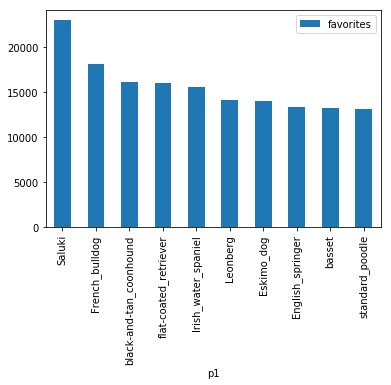

In [134]:
df_all[df_all['p1_dog']== True].groupby('p1')[['favorites']].mean().sort_values(by=['favorites'], ascending=0)[:10].plot.bar()

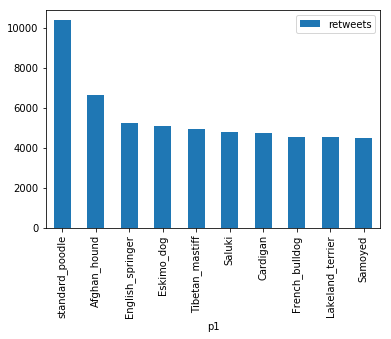

In [135]:
df_all[df_all['p1_dog']== True].groupby('p1')[['retweets']].mean().sort_values(by=['retweets'], ascending=0)[:10].plot.bar()

In [140]:
df_all_1 = df_all[(df_all['rating_denominator'] == 10) & (df_all_1['rating_numerator']<20)]

In [141]:
df_all_1['rating']=  df_all_1['rating_numerator']/df_all_1['rating_denominator']*10

C:\Users\kids1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [142]:
df_all_1['rating'].value_counts()

12.0    450
10.0    419
11.0    396
13.0    261
9.0     150
8.0      95
7.0      51
14.0     35
5.0      33
6.0      32
3.0      19
4.0      15
2.0       9
1.0       4
0.0       2
Name: rating, dtype: int64

C:\Users\kids1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


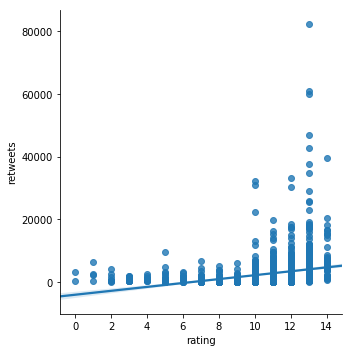

In [143]:
g = sns.lmplot(x="rating", y="retweets", data=df_all_1)

C:\Users\kids1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


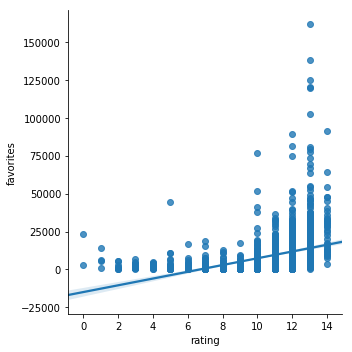

In [144]:
g = sns.lmplot(x="rating", y="favorites", data=df_all_1)

C:\Users\kids1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


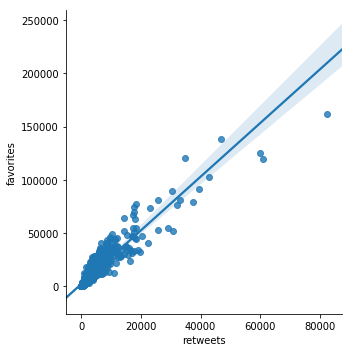

In [145]:
g = sns.lmplot(x="retweets", y="favorites", data=df_all_1)

In [159]:
import statsmodels.api as sm

In [165]:
df_all_ =df_all_1[['rating','retweets','favorites']] .dropna()

In [166]:
X = df_all_[['rating','retweets']] 
Y = df_all_['favorites']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

C:\Users\kids1\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              favorites   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     7043.
Date:                Mon, 03 Jun 2019   Prob (F-statistic):               0.00
Time:                        13:23:29   Log-Likelihood:                -19300.
No. Observations:                1967   AIC:                         3.861e+04
Df Residuals:                    1964   BIC:                         3.862e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5301.0963    498.962    -10.624      0.000   -6279.647   -4322.545
rating       720.0840     47.672     15.105      0.000     626.590     813.578
retweets       2.4237      0.022    108.157      0.000       2.380       2.468
==============================================================================
Omnibus:                      571.339   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14547.119
Skew:                           0.784   Prob(JB):                         0.00
Kurtosis:                      16.230   Cond. No.                     2.68e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [153]:
df_all_2 = df_all_1[['timestamp', 'retweets', 'favorites']]

In [155]:
df_all_2 =df_all_2.set_index('timestamp')

In [157]:
df_all_3=df_all_2.groupby(pd.Grouper(freq='M')).mean()

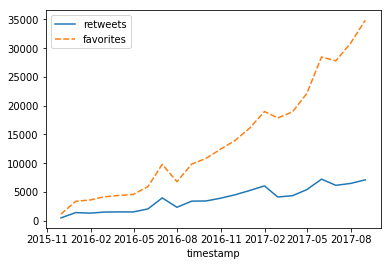

In [158]:
ax = sns.lineplot(data=df_all_3)